<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project 2</h3>
</div>

## Importing the libraries

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


## Load and Prepare Data

In [3]:
churn = pd.read_csv('Churn.csv')
churn.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## EDA

In [5]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

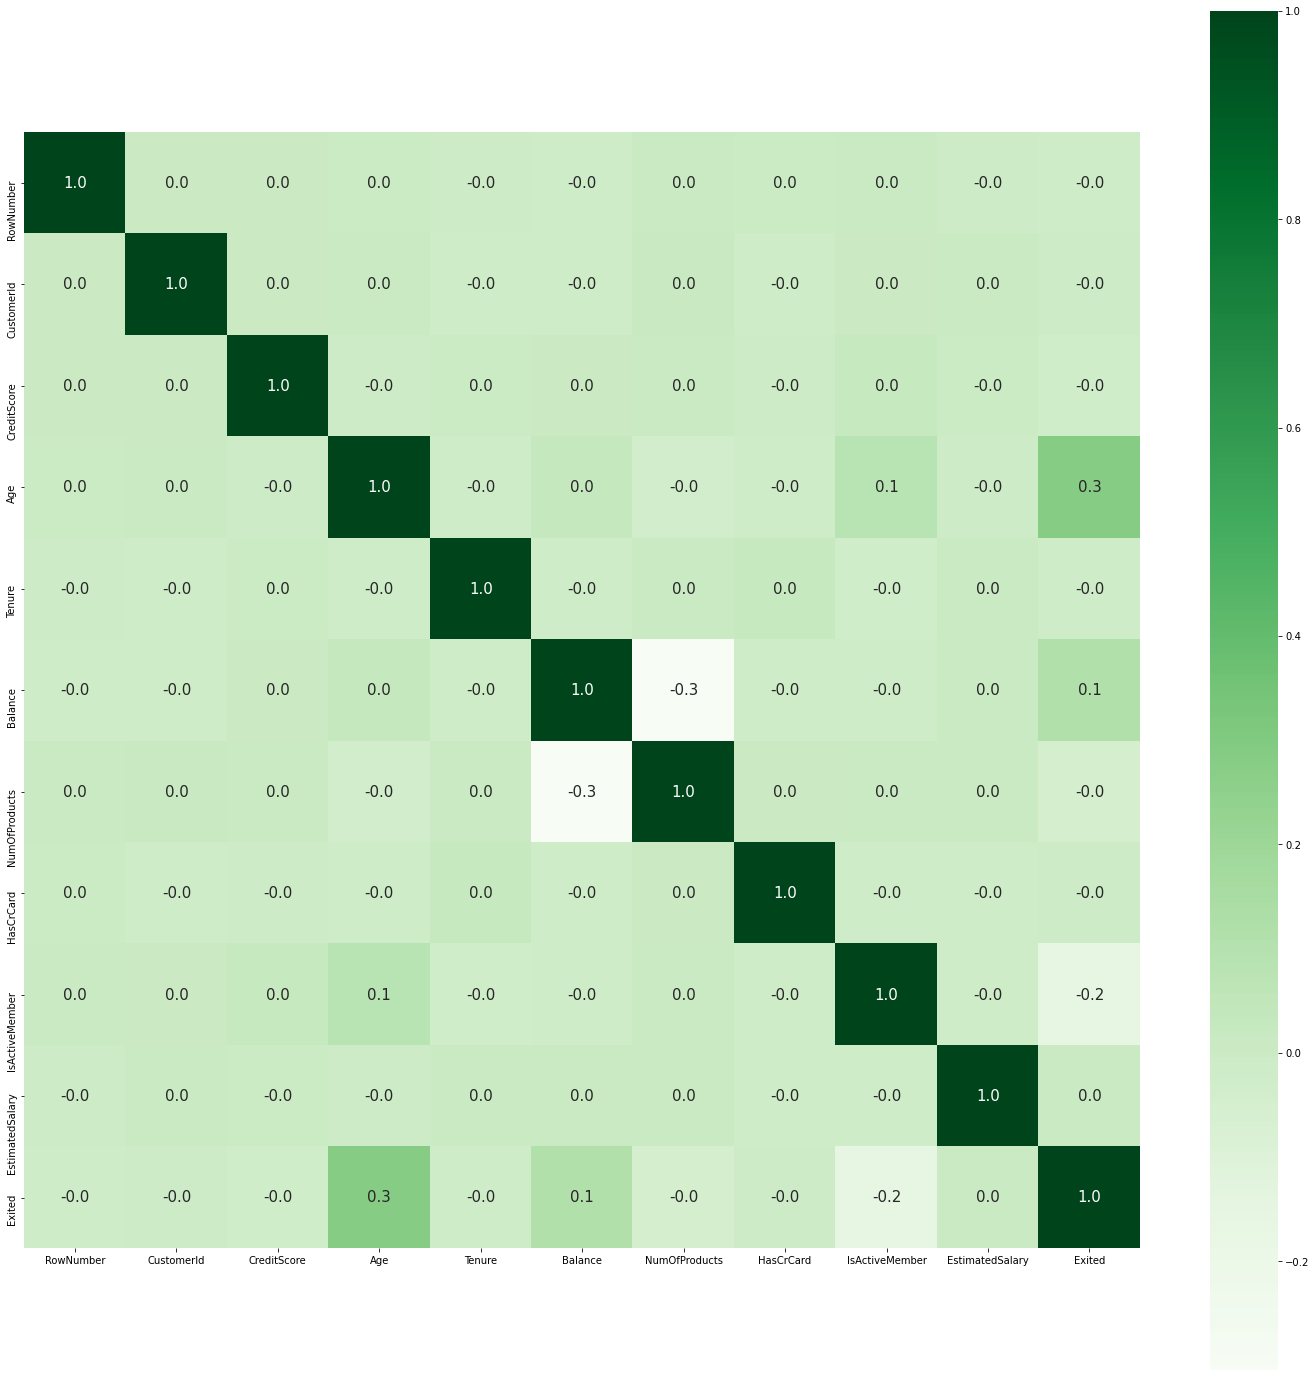

In [8]:
churn_corr = churn.corr()
plt.figure(figsize=(25,25))
sns.heatmap(churn_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [10]:
pd.crosstab(churn.Gender,churn.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


## Data Preprocessing

In [12]:
labelGender = LabelEncoder()
churn['Gender'] = labelGender.fit_transform(churn['Gender'])
labelGeography = LabelEncoder()
churn['Geography'] = labelGeography.fit_transform(churn['Geography'])
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [109]:
X = churn.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
Y = churn['Exited']

In [113]:
X['NumOfProducts'].nunique()

4

In [17]:
sc = StandardScaler()
X= sc.fit_transform(X)

## Visualization

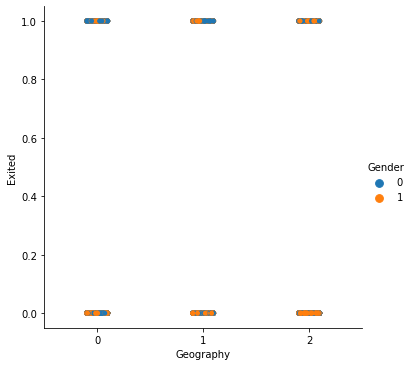

In [19]:
sns.catplot(x='Geography',y='Exited',data=churn,hue='Gender')

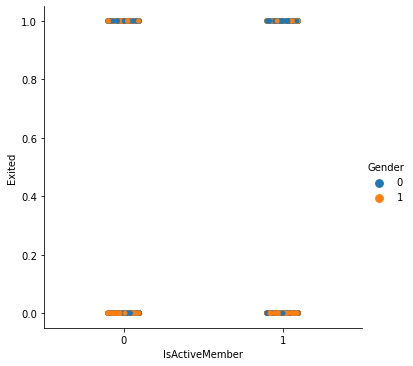

In [21]:
sns.catplot(x='IsActiveMember',y='Exited',data=churn,hue='Gender')

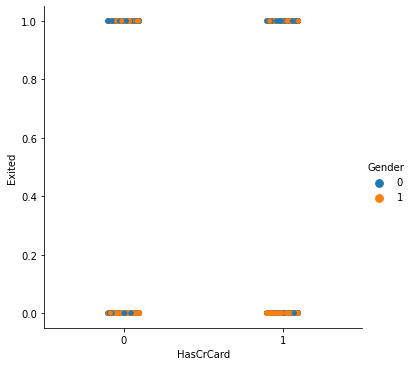

In [24]:
sns.catplot(x='HasCrCard',y='Exited',data=churn,hue='Gender')

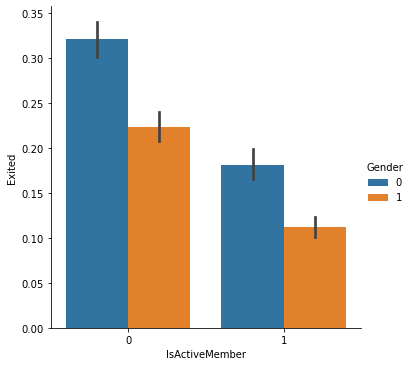

In [25]:
sns.catplot(x='IsActiveMember',y='Exited',data=churn,hue='Gender',kind='bar')

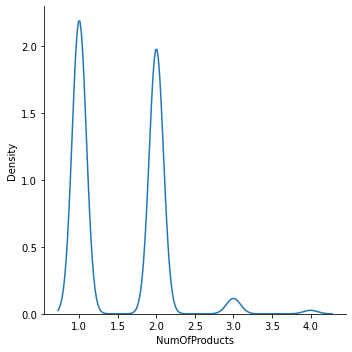

In [27]:
sns.displot(churn,x='NumOfProducts',kind='kde')

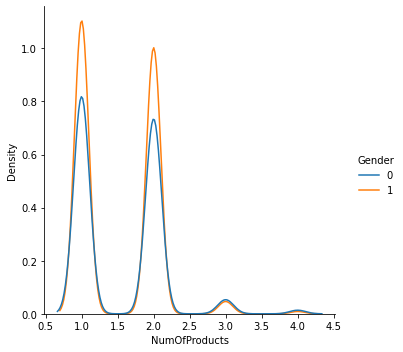

In [28]:
sns.displot(churn,x='NumOfProducts',kind='kde',hue='Gender')

## Train your model (Classification)

### Logistic Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [30]:
logreg = LogisticRegression()
MSE = cross_val_score(logreg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)

-0.190375


In [31]:
logreg.fit(X_train,y_train)
y_test_predict = logreg.predict(X_test)

In [32]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_test_predict)))

The accuracy of Logistic Regression is:  0.807


In [33]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.17      0.26       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



### KNN Method

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_test_knn = knn.predict(X_test)
print(classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1595
           1       0.62      0.37      0.47       405

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



### Optimal value of k

In [36]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

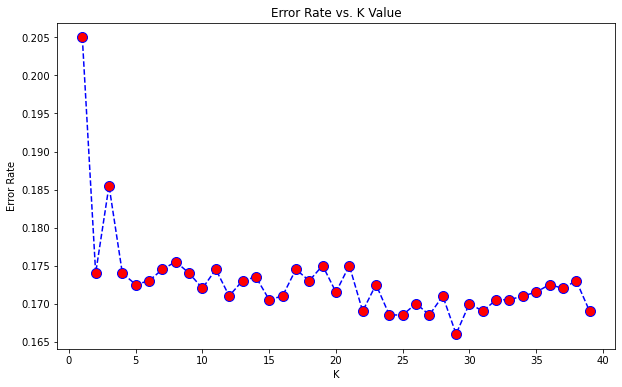

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=29)
MSE = cross_val_score(knn, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
knn.fit(X_train, y_train)

-0.16625


KNeighborsClassifier(n_neighbors=29)

In [39]:
y_test_knn = knn.predict(X_test)
print(classification_report(y_test, y_test_knn))
accuracy = metrics.accuracy_score(y_test, y_test_knn) * 100
print("Accuracy of the KNN Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1595
           1       0.78      0.25      0.38       405

    accuracy                           0.83      2000
   macro avg       0.81      0.62      0.64      2000
weighted avg       0.83      0.83      0.80      2000

Accuracy of the KNN Model:  83.39999999999999


### Naiive Bayes

In [41]:
classifier = GaussianNB()
MSE = cross_val_score(classifier, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
classifier.fit(X_train, y_train)

-0.17224999999999996


GaussianNB()

In [42]:
y_test_NB=classifier.predict(X_test)
print(classification_report(y_test, y_test_NB))
accuracy = metrics.accuracy_score(y_test, y_test_NB) * 100
print("Accuracy of the Naive beyes Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1595
           1       0.75      0.25      0.37       405

    accuracy                           0.83      2000
   macro avg       0.79      0.61      0.64      2000
weighted avg       0.82      0.83      0.80      2000

Accuracy of the Naive beyes Model:  83.1


### ANN Method

In [43]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [44]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [45]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [46]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
ann.fit(X_train, y_train, batch_size = 40, epochs = 700)

Epoch 1/700
200/200 [==============================] - 1s 1ms/step - loss: 0.4513 - accuracy: 0.8027
Epoch 2/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8493
Epoch 3/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8545
Epoch 4/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8579
Epoch 5/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8605
Epoch 6/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8635
Epoch 7/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8639
Epoch 8/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8643
Epoch 9/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8634
Epoch 10/700
200/200 [==============================] - 0s 1ms/step - loss: 0.3205 - accura

200/200 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9180
Epoch 79/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9201
Epoch 80/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9226
Epoch 81/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1878 - accuracy: 0.9193
Epoch 82/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9205
Epoch 83/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9204
Epoch 84/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9211: 0s - loss: 0.1785 - accuracy: 0.92
Epoch 85/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9259
Epoch 86/700
200/200 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9221
Epoch 87/700
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9787
Epoch 228/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9806
Epoch 229/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9835
Epoch 230/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9800
Epoch 231/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9812
Epoch 232/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9809
Epoch 233/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9839
Epoch 234/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9827: 0s - loss: 0.0497 - accuracy: 
Epoch 235/700
200/200 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.98 - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9814
Epoch 236/700

200/200 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9916: 0s - loss: 0.0251 - accuracy: 
Epoch 379/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 380/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9939
Epoch 381/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 382/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9933: 0s - loss: 0.0210 - accuracy: 0.99
Epoch 383/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9921
Epoch 384/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 385/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9941
Epoch 386/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 387/700
200/2

200/200 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 529/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 530/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9884
Epoch 531/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9859
Epoch 532/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 533/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9966
Epoch 534/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.9989: 0s - loss: 0.0053 - accuracy: 0.
Epoch 535/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.9994
Epoch 536/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9996
Epoch 537/700
200/200 [==============================

200/200 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 678/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9926
Epoch 679/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9876
Epoch 680/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9965
Epoch 681/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 682/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 683/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 684/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9986
Epoch 685/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 686/700
200/200 [==============================] - 0s 1ms/step - loss: 0.0073 - a

In [48]:
y_test_ANN = ann.predict(X_test)

In [49]:
for i in range(len(y_test_ANN)):
    if y_test_ANN[i]>=0.5:
        y_test_ANN[i] = 1
    else:
        y_test_ANN[i] = 0

In [50]:
print(classification_report(y_test, y_test_ANN))
accuracy = metrics.accuracy_score(y_test, y_test_ANN) * 100
print("Accuracy of the ANN Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1595
           1       0.50      0.50      0.50       405

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Accuracy of the ANN Model:  79.9


### SVM

In [51]:

svclassifier = SVC(kernel='rbf')
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [52]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

Best Parameters: {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Best Accuracy: 85.61 %


In [53]:
y_test_SVM = grid_search.predict(X_test)
print(classification_report(y_test, y_test_SVM))
accuracy = metrics.accuracy_score(y_test, y_test_SVM) * 100
print("Accuracy of the SVM Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.72      0.37      0.49       405

    accuracy                           0.84      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000

Accuracy of the SVM Model:  84.25


### Decision Tree

In [54]:
classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
MSE = cross_val_score(classifierdt, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
classifierdt.fit(X_train, y_train)

-0.204625


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_test_DT = classifierdt.predict(X_test)
print(classification_report(y_test, y_test_DT))
accuracy = metrics.accuracy_score(y_test, y_test_DT) * 100
print("Accuracy of the decision tree Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1595
           1       0.47      0.49      0.48       405

    accuracy                           0.78      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Accuracy of the decision tree Model:  78.35


### Random Forest

In [57]:
rfc = RandomForestClassifier(criterion = 'gini', random_state = 42,n_estimators=1000)
MSE = cross_val_score(rfc, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
rfc.fit(X_train, y_train)

-0.13762499999999997


RandomForestClassifier(n_estimators=1000, random_state=42)

In [58]:
y_test_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_test_rfc))
accuracy = metrics.accuracy_score(y_test, y_test_rfc) * 100
print("Accuracy of the random forest Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy of the random forest Model:  85.6


### XGBoost

In [98]:
estimator = XGBClassifier(use_label_encoder=False,booster='dart',objective='binary:logistic')
parameters = {"learning_rate"    : [0.02] ,         
     "max_depth"        : [4],
     "min_child_weight" : [ 7],
     "gamma"            : [0.3],
     "colsample_bytree" : [0.55],
     "n_estimators"     : [700],
     "reg_alpha"        : [ 0.5],
     }
grid_search_xgb = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    cv = 10,
    verbose=True
)

grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[12:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:00

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [101]:
y_test_xg = grid_search_xgb.predict(X_test)
print(classification_report(y_test, y_test_xg))
accuracy = metrics.accuracy_score(y_test, y_test_xg) * 100
print("Accuracy of the XGBOOST Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1595
           1       0.73      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy of the XGBOOST Model:  85.7


<AxesSubplot:>

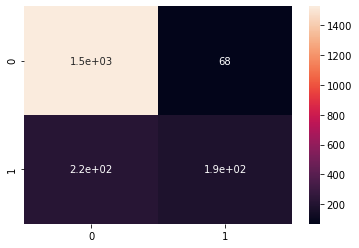

In [102]:
cm_xgb = confusion_matrix(y_test,y_test_xg)
sns.heatmap(cm_xgb,annot=True)